In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("Mall_Customers.csv")

# Use more features now (not just 2)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [4]:
pca.explained_variance_ratio_


array([0.44266167, 0.33308378])

In [5]:
print("Explained Variance by PC1 and PC2:",
      pca.explained_variance_ratio_.sum())


Explained Variance by PC1 and PC2: 0.7757454566976747


In [6]:
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)


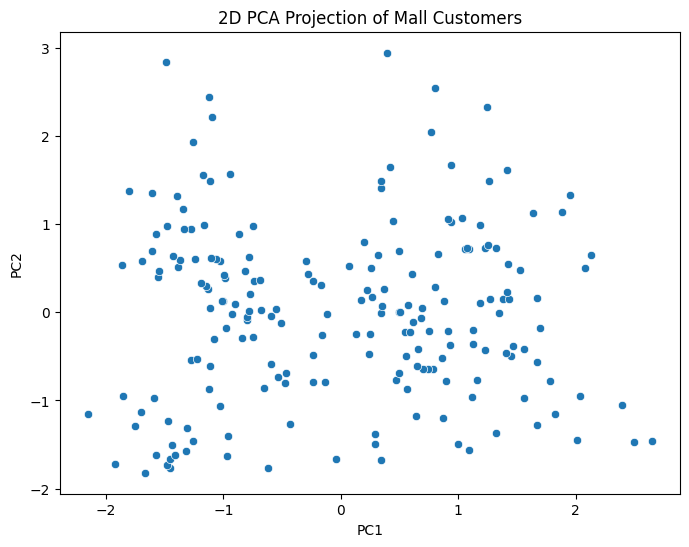

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df
)
plt.title("2D PCA Projection of Mall Customers")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

pca_df["Cluster"] = clusters


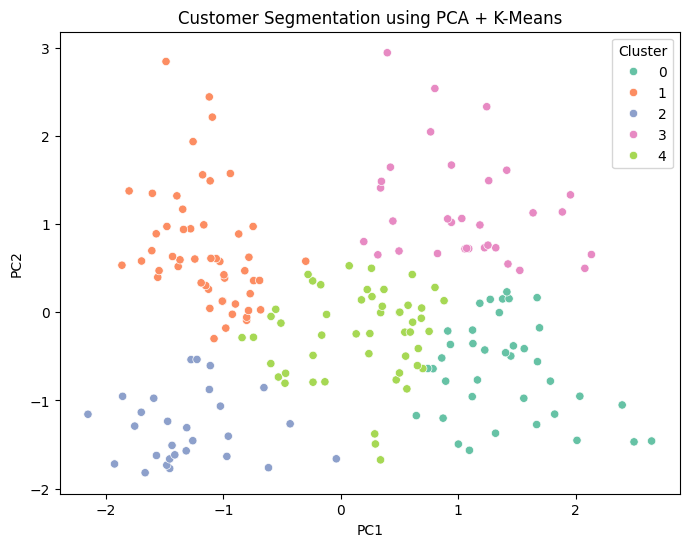

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Cluster",
    data=pca_df,
    palette="Set2"
)
plt.title("Customer Segmentation using PCA + K-Means")
plt.show()
